In [106]:
# Carregando as bibliotecas
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from seaborn import color_palette
from datetime import datetime

In [2]:
# Atribuindo o caminho
caminho = r'D:\Data Science\Projetos\Python\Análise de Risco no Transporte Público\TFL Bus Safety.xlsx'

In [39]:
# Carregando os dados
bd = pd.read_excel(caminho, sheet_name = 'Sheet1')
bd.sample(5)

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
12946,2017,2017-03-01,144,Arriva London North,Arriva London,Wood Green,Enfield,Taken to Hospital – Reported Serious Injury or...,Slip Trip Fall,Passenger,Female,Child
5070,2015,2015-11-01,295,Metroline West,Metroline,Garage Not Available,Wandsworth,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
20980,2018,2018-05-01,484,Abellio London,Abellio,Walworth,Lewisham,Injuries treated on scene,Personal Injury,Passenger,Female,Adult
2224,2015,2015-02-01,391,London United,London United,Garage Not Available,Richmond Upon Thames,Taken to Hospital – Reported Serious Injury or...,Assault,Bus Driver,Male,Adult
7827,2016,2016-04-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Injuries treated on scene,Onboard Injuries,Passenger,Female,Unknown


In [40]:
# Adicionando coluna de mês e concatenando com o ano
bd['Nome_mes'] = bd['Date Of Incident'].dt.strftime('%B')
bd['Year'] = bd['Year'].astype('str')
bd['Mes_Ano'] = bd['Nome_mes'] + '_' + bd['Year']
bd.sample(5)

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age,Nome_mes,Mes_Ano
18736,2018,2018-01-01,261,Selkent,Stagecoach,Bromley,Bromley,Injuries treated on scene,Slip Trip Fall,Passenger,Unknown,Unknown,January,January_2018
5833,2016,2016-01-01,82,Metroline,Metroline,Garage Not Available,Barnet,Injuries treated on scene,Onboard Injuries,Passenger,Male,Adult,January,January_2016
13422,2017,2017-04-01,67,Arriva London North,Arriva London,Stamford Hill,Hackney,Injuries treated on scene,Collision Incident,Bus Driver,Male,Adult,April,April_2017
20258,2018,2018-04-01,222,Metroline West,Metroline,Uxbridge,Hounslow,Reported Minor Injury - Treated at Hospital,Assault,Passenger,Male,Elderly,April,April_2018
4220,2015,2015-09-01,W3,Arriva London North,Arriva London,Garage Not Available,Haringey,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Unknown,Unknown,September,September_2015


In [42]:
# Criando uma coluna com o número correspondente do mês
meses = { 'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9,
    'October': 10, 'November': 11, 'December': 12 }
 
bd['mes'] = bd['Nome_mes'].map(meses)  
bd.sample(5)

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age,Nome_mes,Mes_Ano,mes
6261,2016,2016-10-01,54,Selkent,Stagecoach,Catford,Lewisham,Injuries treated on scene,Slip Trip Fall,Passenger,Male,Unknown,October,October_2016,10
14221,2017,2017-05-01,279,Arriva London North,Arriva London,Enfield,Haringey,Reported Minor Injury - Treated at Hospital,Collision Incident,Pedestrian,Male,Adult,May,May_2017,5
14361,2017,2017-05-01,P4,Selkent,Stagecoach,Catford,Lewisham,Injuries treated on scene,Personal Injury,Passenger,Male,Unknown,May,May_2017,5
5011,2015,2015-11-01,241,East London,Stagecoach,Garage Not Available,Newham,Injuries treated on scene,Onboard Injuries,Member Of Public,Male,Unknown,November,November_2015,11
8616,2016,2016-05-01,222,London United,London United,Garage Not Available,Hounslow,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Passenger,Female,Adult,May,May_2016,5


In [7]:
bd.shape

(23158, 14)

In [8]:
# Verificando NA
bd.isna().sum()

Year                         0
Date Of Incident             0
Route                        0
Operator                     0
Group Name                   0
Bus Garage                   0
Borough                      0
Injury Result Description    0
Incident Event Type          0
Victim Category              0
Victims Sex                  0
Victims Age                  0
Mes                          0
Mes_Ano                      0
dtype: int64

In [45]:
bd.dtypes

Year                                 object
Date Of Incident             datetime64[ns]
Route                                object
Operator                             object
Group Name                           object
Bus Garage                           object
Borough                              object
Injury Result Description            object
Incident Event Type                  object
Victim Category                      object
Victims Sex                          object
Victims Age                          object
Nome_mes                             object
Mes_Ano                              object
mes                                   int64
dtype: object

In [49]:
# Agrupando as variáveis categóricas
cat = [coluna for coluna in bd.columns if coluna not in ['Date Of Incident','mes']]
cat

['Year',
 'Route',
 'Operator',
 'Group Name',
 'Bus Garage',
 'Borough',
 'Injury Result Description',
 'Incident Event Type',
 'Victim Category',
 'Victims Sex',
 'Victims Age',
 'Nome_mes',
 'Mes_Ano']

# Análise univariada

In [11]:
# Resumo estatístico
bd[cat].describe()

,Year,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age,Mes,Mes_Ano
count,23158,23158,23158,23158,23158,23158,23158,23158,23158,23158,23158,23158,23158
unique,4,612,25,14,84,35,4,10,17,3,5,12,45
top,2017,OOS,Metroline,Arriva London,Garage Not Available,Westminster,Injuries treated on scene,Slip Trip Fall,Passenger,Female,Adult,July,July_2017
freq,6573,321,3457,4945,8572,1571,17336,6981,18828,11847,10754,2268,650


As variáveis Route, Garagem, Bairro, Mes_Ano são "pulverizado" (muitas categorias) <br>
A garagem Indisponível tem aproximadamente um terço dos dados (Talvez não faça sentido manter essa coluna) <br>
Machucados tratados no local tem mais de 50% <br>
Passageiros são as principais vítimas dos acidentes (superior a 50% dos casos) <br>
As demais variáveis aparenta ter um equilibrio entre as categorias <br>

In [142]:
# Verificando a quantidade de cada categoria
equilibrio = ['Year', 'Operator', 'Group Name', 'Borough', 'Injury Result Description', 'Incident Event Type', 'Victim Category', 'Victims Sex', 'Victims Age', 'Nome_mes']
for col in equilibrio:
    print(f'''Variável {col}:''')
    print(bd[col].value_counts().sort_index())
    print()

Variável Year:
2015    5715
2016    6093
2017    6573
2018    4777
Name: Year, dtype: int64

Variável Operator:
Abellio London            963
Abellio West              126
Arriva Kent Thameside     107
Arriva London North      3208
Arriva London South      1743
Arriva The Shires         305
Blue Triangle Buses       281
C T Plus                   77
Docklands Buses           100
East London              2402
H R Richmond               59
London Central           1367
London General           1723
London Sovereign          206
London United            2263
Metrobus                  786
Metroline                3457
Metroline West           1232
Quality Line              142
Selkent                  1808
Sullivan Bus & Coach        1
Sullivan Buses              2
TGM GROUP                  61
Tower Transit             738
Uno Buses                   1
Name: Operator, dtype: int64

Variável Group Name:
Abellio                  1089
Arriva Kent Thameside     107
Arriva London            49

Existem dados desconhecidos em Sexo e Idade <br>
Variável Nome do grupo e operador aparentam ser semelhantes, talvez seja interessante manter apenas a variável com quantidade menor de classes <br>
Categoria da Vítima tem dado com informação repetida

In [13]:
# Verificando o percentual dos dados desconhecidos de Sexo
Total = len(bd['Victims Sex'])
qtd_unknown = len(bd[(bd['Victims Sex'] == 'Unknown')])
percentual = (qtd_unknown)/(Total)*100
percentual

15.55402020899905

In [14]:
# Verificando o percentual dos dados desconhecidos de Idade
percentual_age = len(bd[(bd['Victims Age'] == 'Unknown')])/len(bd['Victims Age'])*100
percentual_age

30.81008722687624

Eliminando os dados desconhecidos de sexo devido

In [143]:
# Eliminando os dados desconhecidos de sexo e a garagem
df = bd[['Year', 'Date Of Incident', 'Route', 'Operator', 'Group Name','Borough','Injury Result Description','Incident Event Type','Victim Category','Victims Sex','Victims Age', 'Nome_mes', 'Mes_Ano', 'mes']]
df = df[(df['Victims Sex'] != 'Unknown')]
df.sample(5)

,Year,Date Of Incident,Route,Operator,Group Name,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age,Nome_mes,Mes_Ano,mes
21650,2018,2018-07-01,18,London United,London United,Kensington & Chelsea,Injuries treated on scene,Slip Trip Fall,Passenger,Male,Adult,July,July_2018,7
17391,2017,2017-11-01,60,Arriva London South,Arriva London,Croydon,Injuries treated on scene,Slip Trip Fall,Passenger,Female,Adult,November,November_2017,11
21879,2018,2018-07-01,185,London Central,Go-Ahead,Lewisham,Taken to Hospital – Reported Serious Injury or...,Slip Trip Fall,Passenger,Female,Adult,July,July_2018,7
5137,2015,2015-11-01,466,Arriva London South,Arriva London,Croydon,Taken to Hospital – Reported Serious Injury or...,Collision Incident,Bus Driver,Male,Adult,November,November_2015,11
15622,2017,2017-08-01,49,Abellio London,Abellio,Wandsworth,Reported Minor Injury - Treated at Hospital,Collision Incident,Cyclist,Male,Youth,August,August_2017,8


In [72]:
# Verificando o novo percentual dos dados desconhecidos de Idade
percentual_age = len(df[(df['Victims Age'] == 'Unknown')])/len(df['Victims Age'])*100
print(f'O percentual é de: {percentual_age:.2f}%')
df['Victims Age'].value_counts()

O percentual é de: 21.70%


Adult      10595
Unknown     4244
Elderly     2745
Child       1669
Youth        303
Name: Victims Age, dtype: int64

Como já excluiu-se 15% dos dados (Sexo) e que a classe adulto é muito superior as demais categorias (idoso e crianças), vou substituir os desconhecidos por adulto

In [73]:
# Substituindo a idade desconhecido pela moda
df['Victims Age'] = df['Victims Age'].replace('Unknown', 'Adult')
df['Victims Age'].value_counts()

Adult      14839
Elderly     2745
Child       1669
Youth        303
Name: Victims Age, dtype: int64

In [149]:
# Verificando a Categoria da Vítima e corrigindo-a
print(df['Victim Category'].value_counts())
df['Victim Category'] = df['Victim Category'].str.replace(' ', '_')
print(df['Victim Category'].value_counts())
df['Victim Category'] = df['Victim Category'].str.replace('Cyclist_', 'Cyclist')
df['Victim Category'] = df['Victim Category'].str.replace('Motorcyclist_', 'Motorcyclist')
df['Victim Category'].value_counts()

Passenger                      15652
Bus_Driver                      1479
Pedestrian                      1397
3rd_Party_driver_/_Occupant      475
Cyclist                          227
Member_Of_Public                 110
Motorcyclist                      88
Operational_Staff                 48
Cyclist_                          31
Conductor                         24
Other                              9
Contractor_Staff                   6
Non-Operational_Staff              4
Motorcyclist_                      3
TfL_Staff                          3
Name: Victim Category, dtype: int64
Passenger                      15652
Bus_Driver                      1479
Pedestrian                      1397
3rd_Party_driver_/_Occupant      475
Cyclist                          227
Member_Of_Public                 110
Motorcyclist                      88
Operational_Staff                 48
Cyclist_                          31
Conductor                         24
Other                              9
Co

Passenger                      15652
Bus_Driver                      1479
Pedestrian                      1397
3rd_Party_driver_/_Occupant      475
Cyclist                          258
Member_Of_Public                 110
Motorcyclist                      91
Operational_Staff                 48
Conductor                         24
Other                              9
Contractor_Staff                   6
Non-Operational_Staff              4
TfL_Staff                          3
Name: Victim Category, dtype: int64

# Interrompendo a análise exploratória para responder algumas perguntas de negócio

# 1- Qual a quantidade de incidentes por gênero?

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


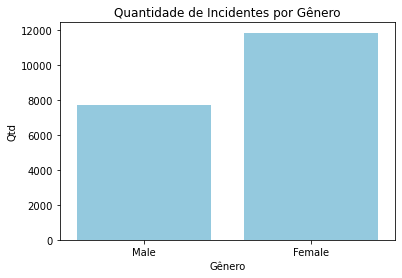

In [74]:
# Criando um count plot para a variável gênero
sns.countplot(df['Victims Sex'], color='skyblue')  
plt.xlabel('Gênero')  
plt.ylabel('Qtd')  
plt.title('Quantidade de Incidentes por Gênero')  
plt.show()

Faz sentido mulher ? <br>
Hipótese: <br>
* Mulher tem menos força para se segurar em uma freada brusca? <br>
* Mulher é mais distraída ao andar na rua? Creio que não <br>
* Existem um número maior de mulher do que homem em Londres?

# 2- Qual faixa etária esteve mais envolvida nos incidentes?

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


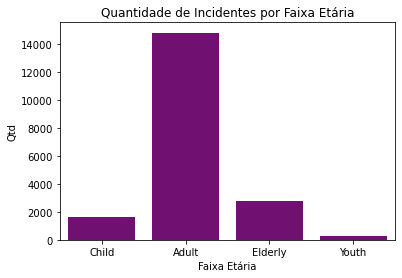

In [75]:
# Criando um count plot para a variável idade
sns.countplot(df['Victims Age'], color='purple')  
plt.xlabel('Faixa Etária')  
plt.ylabel('Qtd')  
plt.title('Quantidade de Incidentes por Faixa Etária')  
plt.show()

Faz sentido Adulto? <br>
Hipótese: <br>
* Quantidade de adultos andando no ônibus é maior ? Creio que sim <br>
* Adultos normalmente vão em pé no ônibus ? Faz sentido, dado assentos preferênciais <br>
* A faixa etária adulto é muito maior que as demais ? Faz sentido

# 3- Qual o percentual de incidentes por tipo de evento (Incident Event Type)?

In [76]:
# Calculando o percentual dos tipos de incidentes
Total_incidentes = len(df['Incident Event Type'])
incidentes = df['Incident Event Type'].value_counts()
percentuais = (incidentes)/(Total_incidentes) * 100
print(f'''O percentual de cada incidente é:
{percentuais}''')

O percentual de cada incidente é:
Slip Trip Fall             32.803232
Onboard Injuries           24.284107
Personal Injury            20.812027
Collision Incident         18.055840
Assault                     2.838004
Activity Incident Event     0.511352
Vandalism Hooliganism       0.337492
Safety Critical Failure     0.311925
Fire                        0.030681
Robbery                     0.015341
Name: Incident Event Type, dtype: float64


In [77]:
# Agrupando os baixos percentuais
df_incidente = pd.DataFrame(percentuais).reset_index()
df_incidente['index'] = df_incidente.apply(lambda row: 'Other' if row['Incident Event Type'] < 2 else row['index'], axis=1)
df_incidente = df_incidente.groupby(['index']).agg({'Incident Event Type':'sum'}).reset_index()
df_incidente.columns = ['Incidente', 'Percentual']  
df_incidente

,Incidente,Percentual
0,Assault,2.838004
1,Collision Incident,18.055840
2,Onboard Injuries,24.284107
3,Other,1.206791
4,Personal Injury,20.812027
5,Slip Trip Fall,32.803232


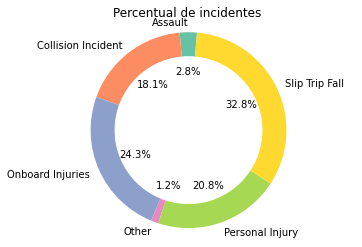

In [78]:
# Plotando o percentual de incidente
plt.pie(df_incidente['Percentual'], labels=df_incidente['Incidente'], autopct='%1.1f%%', startangle=85, colors=sns.color_palette('Set2'))
plt.title('Percentual de incidentes')
plt.axis('equal') 
plt.gca().add_artist(plt.Circle((0, 0), 0.75, color='white'))
plt.show()

# 4- Como foi a evolução de incidentes por mês ao longo do tempo?

In [79]:
# Contando os incidentes por mês e agrupando em um dataframe
qtd_incidente = bd[['mes', 'Year']].value_counts().sort_index()
quantidade = pd.DataFrame(qtd_incidente).reset_index()
quantidade.columns = ['Mes', 'Ano', 'Quantidade']
quantidade['Ano_Mes'] = quantidade['Ano'].astype('str') + '_' + quantidade['Mes'].astype('str')
quantidade = quantidade.sort_values('Ano_Mes')
quantidade.head()

,Mes,Ano,Quantidade,Ano_Mes
0,1,2015,399,2015_1
36,10,2015,470,2015_10
39,11,2015,495,2015_11
42,12,2015,523,2015_12
4,2,2015,371,2015_2


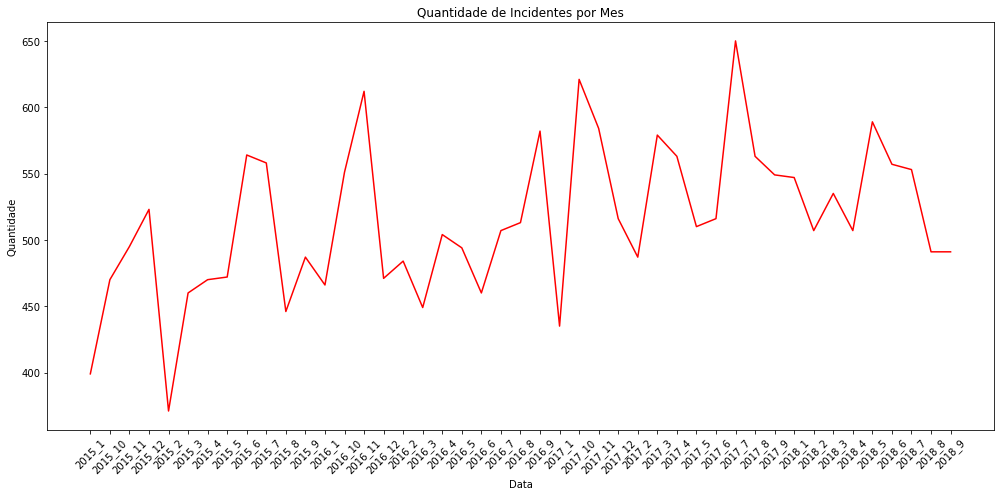

In [80]:
# Plotando a série temporal
plt.figure(figsize=(14, 7))
sns.lineplot(x = 'Ano_Mes', y ='Quantidade', data = quantidade, color = 'red')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.title('Quantidade de Incidentes por Mes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hipotese: <br>
* As pessoas estão mais distraídas ? <br>
* Sazonalidade: No verão tem um número maior de incidentes pelo fato de haver mais pessoas nas ruas ?

# 5- Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo pessoas do sexo feminino?

In [82]:
# Filtrando e Agrupando o DataFrame
incidente_fem = df[['mes', 'Nome_mes', 'Incident Event Type', 'Victims Sex']]
incidente_fem = incidente_fem[(incidente_fem['Incident Event Type'] == 'Collision Incident')].groupby(['mes', 'Nome_mes',
                                                                                                      'Victims Sex']).agg({'Incident Event Type':'count'}).reset_index()
incidente_fem.sample(5)

,mes,Nome_mes,Victims Sex,Incident Event Type
16,9,September,Female,158
21,11,November,Male,138
20,11,November,Female,140
23,12,December,Male,127
13,7,July,Male,210


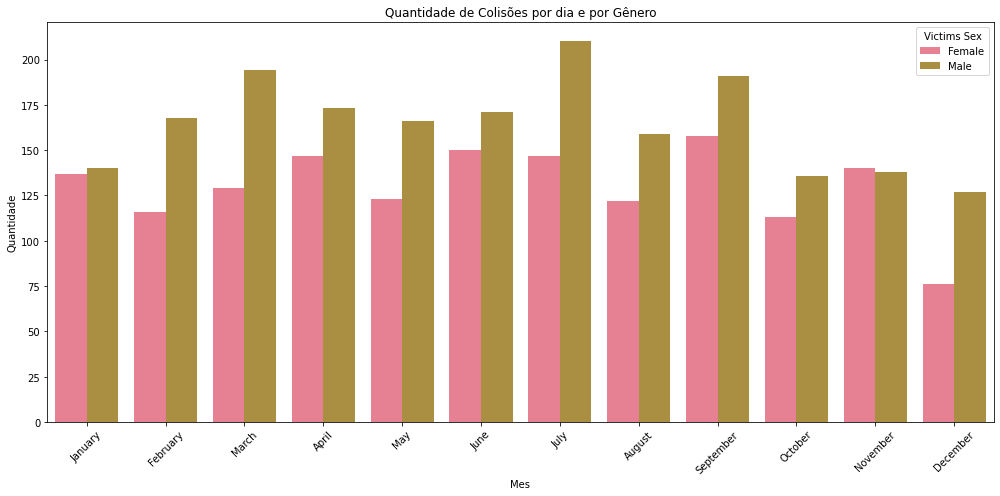

In [126]:
# Plotando a Série Temporal por Gênero
plt.figure(figsize=(14, 7))
sns.barplot(x = 'Nome_mes', y ='Incident Event Type', data = incidente_fem, hue = 'Victims Sex', palette=color_palette(color_palette("husl")))
plt.xlabel('Mes')
plt.ylabel('Quantidade')
plt.title('Quantidade de Colisões por dia e por Gênero')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mulheres estão mais envolidas que incidentes <br>
Para batidas, faz sentido o homem dominar na categoria? <br>
Hipotese: <br>
* Mulheres são mais cuidadosas ao dirigir ? <br>
* A quantidade de homens que dirigem é muito maior do que o número de mulheres ? <br>
* Pico em Julho (homem), devido ao verão ? <br>
* Pico em Setembro (Mulheres)

# 6- Qual foi a média de incidentes por mês envolvendo crianças (Child)?

In [95]:
# Agrupando os dados por Faixa Etária e tirando a média
crianca = df[['Year', 'mes', 'Nome_mes', 'Victims Age']]
crianca = crianca[(crianca['Victims Age'] == 'Child')].groupby(['Year', 'mes', 'Nome_mes']).agg({'Victims Age': 'count'}).reset_index()
crianca = crianca.groupby(['mes', 'Nome_mes']).agg({'Victims Age':'mean'}).reset_index()
crianca.sample(5)

,mes,Nome_mes,Victims Age
8,9,September,42.75
9,10,October,37.00
1,2,February,29.50
5,6,June,47.00
2,3,March,38.00


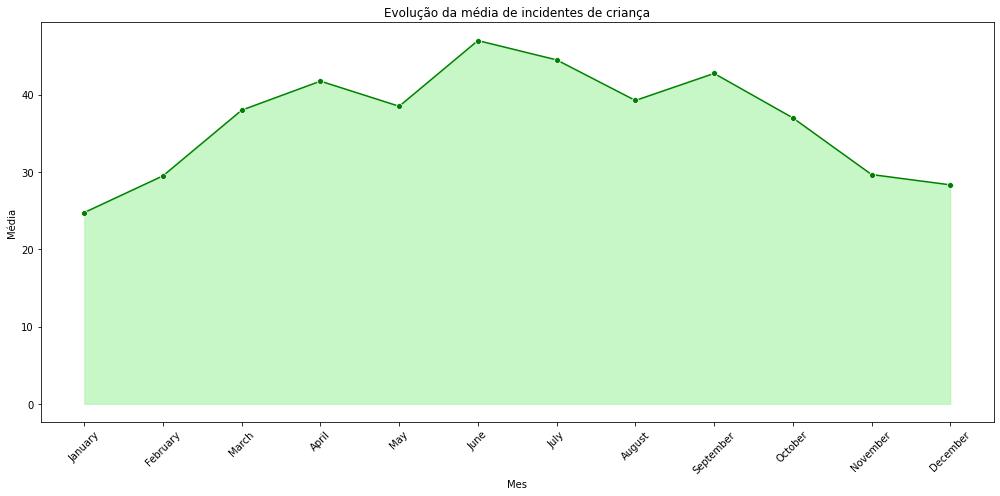

In [100]:
# Plotando a média por mês
plt.figure(figsize=(14, 7))
sns.lineplot(x = 'Nome_mes', y ='Victims Age', data = crianca, color = 'green', marker='o')
plt.fill_between(crianca['Nome_mes'], crianca['Victims Age'], color='lightgreen', alpha=0.5)
plt.xlabel('Mes')
plt.ylabel('Média')
plt.title('Evolução da média de incidentes de criança')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hipótese: Pico de incidentes em Junho devido ao início do verão ? <br>

# 7- Considerando a descrição de incidente como “Injuries treated on scene” (coluna Injury Result Description), qual o total de incidentes de pessoas do sexo masculino e sexo feminino?

In [102]:
# Agrupando os dados
descricao = df[['Injury Result Description', 'Victims Sex']]
descricao = descricao[(descricao['Injury Result Description'] == 'Injuries treated on scene')].groupby(['Victims Sex']).agg({'Injury Result Description':'count'}).reset_index()
descricao

,Victims Sex,Injury Result Description
0,Female,8816
1,Male,5632


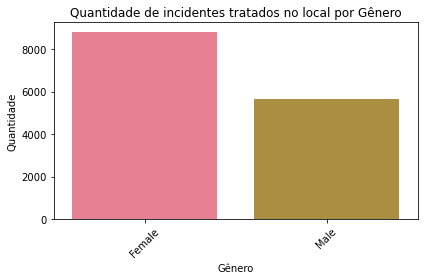

In [125]:
# Plotando os dados de Incidentes tratados no local
sns.barplot(x = 'Victims Sex', y ='Injury Result Description', data = descricao, palette=color_palette("husl"))
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.title('Quantidade de incidentes tratados no local por Gênero')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8- No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?

In [129]:
# Agrupando os dados
idoso = df[['mes', 'Nome_mes', 'Victims Age', 'Year']]
idoso = idoso[(idoso['Year'] == '2017') & (idoso['Victims Age'] == 'Elderly')]
idoso = idoso.groupby(['mes', 'Nome_mes']).agg({'Victims Age':'count'}).reset_index()
idoso

,mes,Nome_mes,Victims Age
0,1,January,66
1,2,February,53
2,3,March,77
3,4,April,75
4,5,May,68
5,6,June,65
6,7,July,80
7,8,August,68
8,9,September,78
9,10,October,68


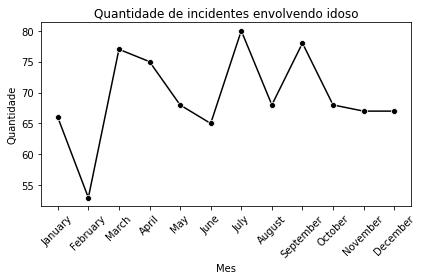

In [130]:
# Plotando o gráfico
sns.lineplot(x = 'Nome_mes', y ='Victims Age', data = idoso, color = 'black', marker='o')
plt.xlabel('Mes')
plt.ylabel('Quantidade')
plt.title('Quantidade de incidentes envolvendo idoso')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 9- Considerando o Operador qual a distribuição de incidentes ao longo do tempo?

In [134]:
# Contando os incidentes por operador e mês e agrupando em um dataframe
operador = df[['mes', 'Nome_mes', 'Year', 'Operator', 'Date Of Incident']]
operador = operador.groupby(['mes', 'Nome_mes', 'Year', 'Operator']).agg({'Date Of Incident':'count'}).reset_index()
operador['Ano_Mes'] = operador['Year'].astype('str') + '_' + operador['mes'].astype('str')
operador = operador.sort_values('Ano_Mes')
operador.head()

,mes,Nome_mes,Year,Operator,Date Of Incident,Ano_Mes
0,1,January,2015,Abellio London,11,2015_1
15,1,January,2015,Tower Transit,5,2015_1
14,1,January,2015,Selkent,25,2015_1
13,1,January,2015,Metroline West,14,2015_1
11,1,January,2015,Metrobus,12,2015_1


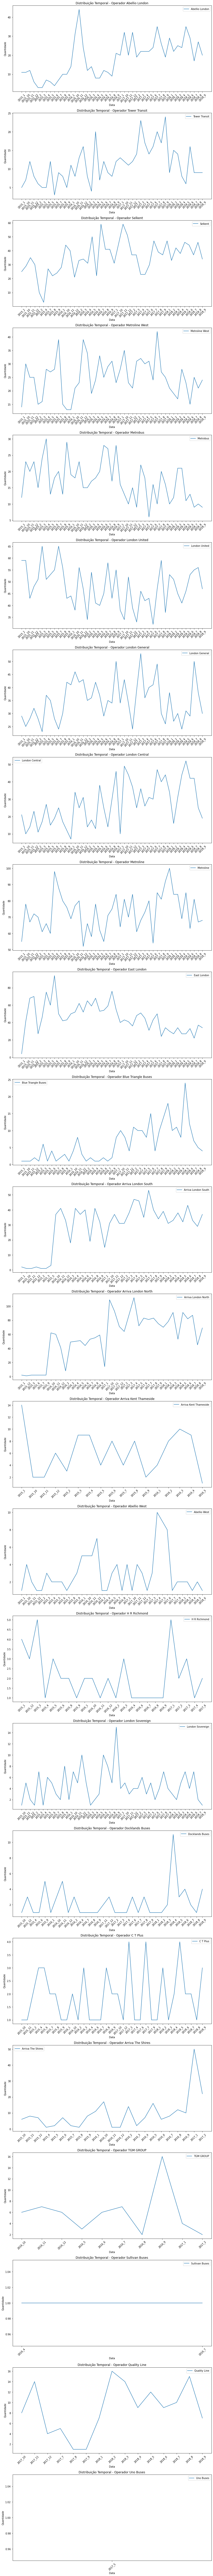

In [136]:
# Plotando os gráficos de cada categoria
op = operador['Operator'].unique()
num_op = len(op)

plt.figure(figsize=(12, 6 * num_op))

for i, categoria in enumerate(op, 1):
    plt.subplot(num_op, 1, i)
    subset = operador[operador['Operator'] == categoria]
    sns.lineplot(x='Ano_Mes', y='Date Of Incident', data=subset, label=categoria)
    plt.xlabel('Data')
    plt.ylabel('Quantidade')
    plt.title(f'Distribuição Temporal - Operador {categoria}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 10- Qual o tipo de incidente mais comum com ciclistas?

In [152]:
ciclista = df[['Victim Category', 'Incident Event Type']]
ciclista = ciclista[(ciclista['Victim Category'] == 'Cyclist')].groupby(['Incident Event Type']).agg({'Victim Category':'count'}).reset_index()
ciclista

,Incident Event Type,Victim Category
0,Assault,1
1,Collision Incident,239
2,Onboard Injuries,4
3,Personal Injury,8
4,Slip Trip Fall,6


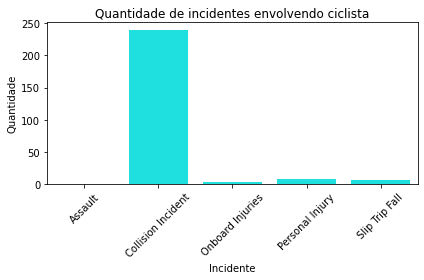

In [153]:
sns.barplot(x = 'Incident Event Type', y ='Victim Category', data = ciclista, color = 'Cyan')
plt.xlabel('Incidente')
plt.ylabel('Quantidade')
plt.title('Quantidade de incidentes envolvendo ciclista')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()